In [1]:
import sqlalchemy
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import numpy as np
from functools import reduce

In [2]:
from db_sqlinfohw import pw
import pg8000

In [3]:
#Establish database path using pg8000
path = 'postgresql+pg8000://'+pw+'@localhost:5432/SQL_Homework_DB'

In [4]:
#Create engine & connection
engine = create_engine('postgresql+pg8000://'+pw+'@localhost:5432/SQL_Homework_DB')
connection = engine.connect()

In [22]:
#Explore tables in database
inspector = inspect(engine)
inspector.get_table_names()


['salaries', 'employees', 'titles', 'departments', 'dept_manager', 'dept_emp']

In [6]:
#Explore columns in database
columns = inspector.get_columns('salaries')
for c in columns:
    print(c['name'], c["type"])

emp_no INTEGER
salary INTEGER
from_date DATE
to_date DATE


In [7]:
#Query database table Salaries, return values
engine.execute('SELECT * FROM salaries LIMIT 5').fetchall()

[(10001, 60117, datetime.date(1986, 6, 26), datetime.date(1987, 6, 26)),
 (10002, 65828, datetime.date(1996, 8, 3), datetime.date(1997, 8, 3)),
 (10003, 40006, datetime.date(1995, 12, 3), datetime.date(1996, 12, 2)),
 (10004, 40054, datetime.date(1986, 12, 1), datetime.date(1987, 12, 1)),
 (10005, 78228, datetime.date(1989, 9, 12), datetime.date(1990, 9, 12))]

In [8]:
#Query data into an easy to read table from SQL database
df = pd.read_sql_query('select * from salaries',con=engine)
df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [9]:
#Binning of salaries per inital query above
bins = [20000, 40000, 60000, 80000, 100000, 500000]

group_names = ["20-40K", "40-60K", "60-80K", "80-100K","over 100K"]


In [10]:
#Insert Salary Range column into dataframe
df["salary_range"] = pd.cut(df["salary"], bins, labels=group_names)
df.head()

,emp_no,salary,from_date,to_date,salary_range
0,10001,60117,1986-06-26,1987-06-26,60-80K
1,10002,65828,1996-08-03,1997-08-03,60-80K
2,10003,40006,1995-12-03,1996-12-02,40-60K
3,10004,40054,1986-12-01,1987-12-01,40-60K
4,10005,78228,1989-09-12,1990-09-12,60-80K


In [11]:
#Salary range count per
salary_groups = df.groupby('salary_range')

countper_range = pd.DataFrame(salary_groups['salary_range'].count())
countper_range

,salary_range
salary_range,
20-40K,95346
40-60K,121043
60-80K,66219
80-100K,16129
over 100K,1287


In [12]:
hist_df = df.drop(['emp_no','from_date','to_date','salary_range'], axis=1)
hist_df.head()

,salary
0,60117
1,65828
2,40006
3,40054
4,78228


In [13]:
a = np.array(hist_df)
x = a[0:,0]

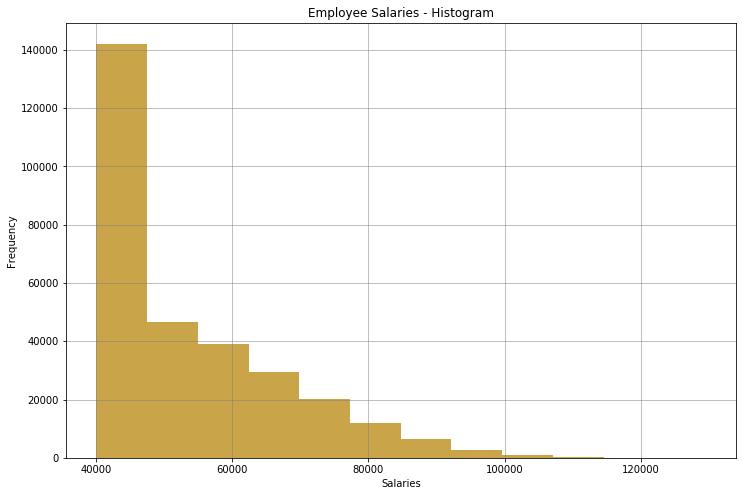

In [14]:
#Plot Histogram of the Salary DataFrame created above
fig, ax = plt.subplots(figsize=(12, 8))

n, bins, patches = plt.hist(x, 12, facecolor='darkgoldenrod', alpha=0.75)

plt.title('Employee Salaries - Histogram')
plt.ylabel('Frequency')
plt.xlabel('Salaries')

plt.grid(color='grey', linewidth=.5)
plt.show()
fig.savefig('Employee_Salary_Histogram.png')

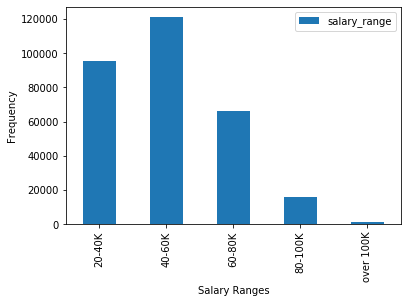

<Figure size 432x288 with 0 Axes>

In [15]:
#Bar chart summarizing the salary ranges and frequencies of each
#While unnecessary for this HW, this view is (in my opinion) more telling than a histogram
count_chart = countper_range.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Salary Ranges")
count_chart.set_ylabel("Frequency")


plt.show()
plt.tight_layout()

In [16]:
#Query tables
engine.execute('SELECT * FROM employees LIMIT 5').fetchall()
engine.execute('SELECT * FROM salaries LIMIT 5').fetchall()
engine.execute('SELECT * FROM titles LIMIT 5').fetchall()

employees = pd.read_sql_query('select * from employees',con=engine)
salaries = pd.read_sql_query('select * from salaries',con=engine)
titles = pd.read_sql_query('select * from titles',con=engine)

In [17]:
#Create DataFrames for each queried table
employees_df = pd.DataFrame(employees)
salaries_df = pd.DataFrame(salaries)
titles_df = pd.DataFrame(titles)

In [18]:
#Merge aformentioned DataFrames together into 1
dfs = [employees_df, salaries_df, titles_df]
df_final = reduce(lambda left,right: pd.merge(left,right,on='emp_no'), dfs)
df_final.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [19]:
#Summarized DataFrame, by Title and Avg Salary

grouped_title_df = df_final.groupby(['title'])['salary']
avg_salary = grouped_title_df.mean()

grouped_salaries_df = avg_salary.reset_index()
grouped_salaries_df

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


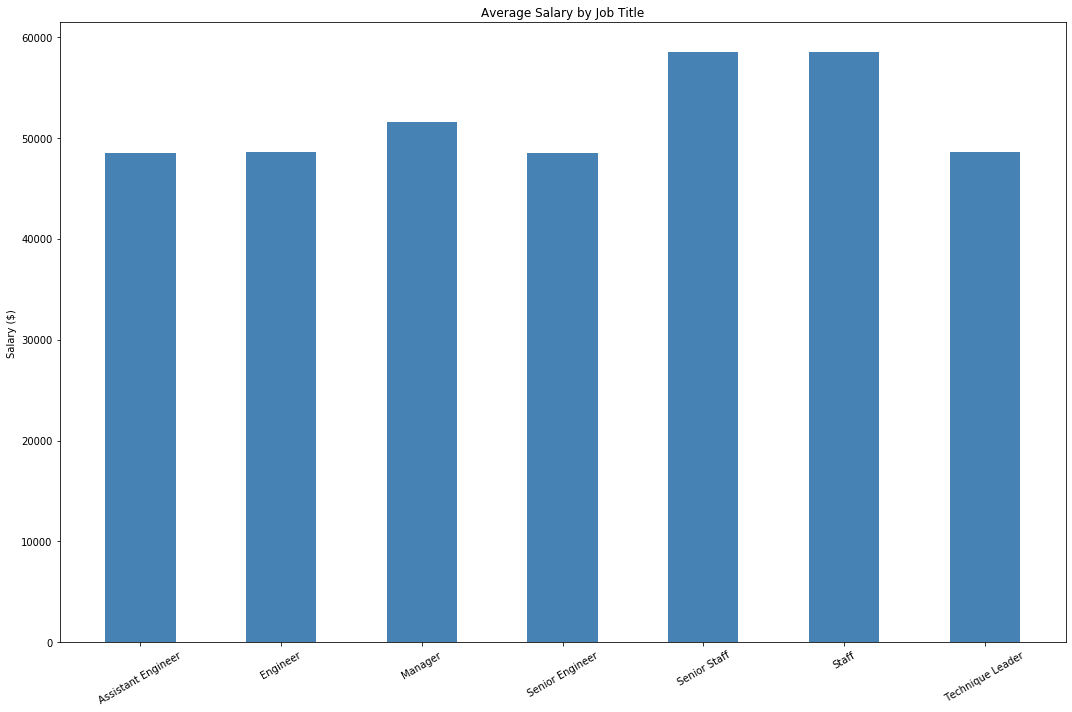

In [20]:
#Plot Average Salary by Job Title
fig, ax = plt.subplots(figsize=(15,10))

x_axis = grouped_salaries_df["title"]
y_axis = grouped_salaries_df["salary"]

plt.bar(x_axis, y_axis,color="steelblue", align="center", width=.5)

plt.xticks(rotation=30)

ax.set_ylabel('Salary ($)')
ax.set_title('Average Salary by Job Title')

plt.tight_layout()